# Data Setup

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn_pandas import DataFrameMapper

In [2]:
# load titanic dataset
titanic_df = pd.read_csv("./train.csv", index_col=0)

# drop columns that lack useful information: Name () and Ticket ()
titanic_df.drop(columns=["Name", "Ticket"], axis=1, inplace=True)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S
2,1,1,female,38.0,1,0,71.2833,C85,C
3,1,3,female,26.0,0,0,7.9250,NaN,S
4,1,1,female,35.0,1,0,53.1000,C123,S
5,0,3,male,35.0,0,0,8.0500,NaN,S


In [3]:
# view current data types of features
print(f"Titanic data has shape: {titanic_df.shape}\n")
titanic_df.info(verbose=True)

Titanic data has shape: (891, 9)

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.6+ KB


In [4]:
# convert features to nominal category data
titanic_df[["Sex", "Cabin", "Embarked"]] = titanic_df.select_dtypes(include="object").astype(pd.CategoricalDtype())

# convert feature to ordinal category data
titanic_df.loc[titanic_df["Pclass"] == 1, "Pclass"] = "1st"
titanic_df.loc[titanic_df["Pclass"] == 2, "Pclass"] = "2nd"
titanic_df.loc[titanic_df["Pclass"] == 3, "Pclass"] = "3rd"

# adjust ordering of the categories such that 1st class is the highest and 3rd is the lowest
titanic_df[["Pclass"]] = titanic_df[["Pclass"]].astype(pd.CategoricalDtype(ordered=True))
titanic_df["Pclass"] = titanic_df["Pclass"].cat.reorder_categories(["3rd", "2nd", "1st"])

# get description of data
titanic_df.describe()

,Survived,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,0.523008,0.381594,32.204208
std,0.486592,14.526497,1.102743,0.806057,49.693429
min,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200


## Exploratory Data Analysis
We create visualizations that help shed light on the distributions of the features and response variables. The results well allow us to make educated decisions about the type of preprocessing we do and the (hopefully positive) effects it will have on the outcome of our analysis.

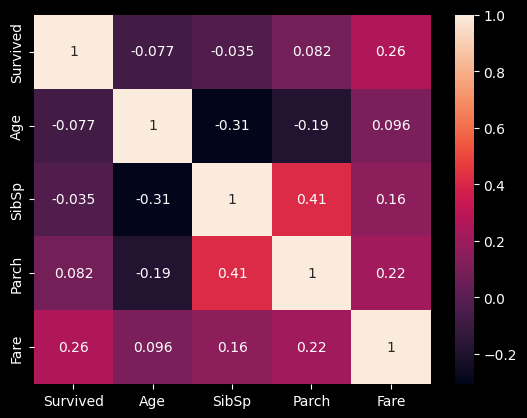

In [14]:
sns.heatmap(titanic_df.corr(numeric_only=True), annot=True);

## Imputation & Preprocessing
The features `Age` and `Cabin` which describe the age of the passenger and the cabin in which they were staying, respectively, have a number of null values. To inform the imputation of data, we examine the distribution of other features for null observations as they can help highlight: 1) Any patterns in the distribution of the data for observations with missing values; 2) Whether these other features will be helpful in informing what reasonable missing values might be for a given observation; and 3) What imputation method might make the most sense to use

In [ ]:
# create encoders for categorical and numerical variables
#ordinal_encoder = preprocessing.OrdinalEncoder()
#onehot_encoder = preprocessing.OneHotEncoder()
#standardizer = preprocessing.StandardScaler()
#normalizer = preprocessing.MinMaxScaler()